In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

from skimage import io
import tensorflow as tf
import PIL
os.chdir('/home/juanp.montoya/NeuralNetworks/Final_Project/input')

In [5]:
nRowsRead = 1000 
df1 = pd.read_csv('class_dict.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'class_dict.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7 rows and 4 columns


In [6]:
nRowsRead = None 
df2 = pd.read_csv('metadata.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'metadata.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1146 rows and 4 columns


In [7]:
from keras_preprocessing.image import ImageDataGenerator

In [27]:
img_height = 2448
img_width = 2448

In [163]:
# df=pd.read_csv(r".\train.csv")
datagen=ImageDataGenerator(rescale=1./255)


In [186]:
train_generator = datagen.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="mask_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            target_size=(img_height,img_width), 
                                            batch_size=32)

Found 803 validated image filenames.


In [187]:
x, y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

TypeError: 'DataFrameIterator' object is not callable

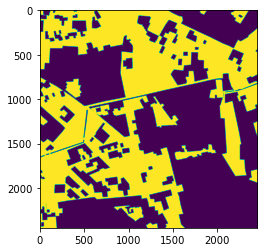

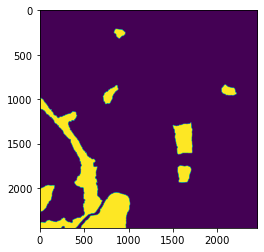

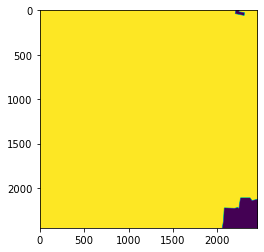

In [165]:
x = train_generator.next()
for i in range(3):
    image = x[i,:,:,0]
    plt.imshow(image)
    plt.show()

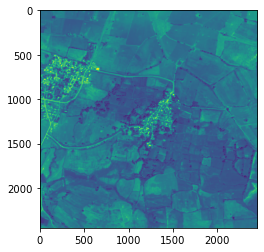

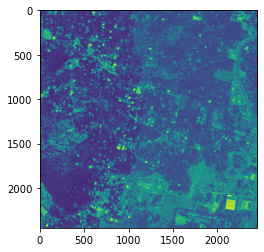

In [157]:
x = train_generator.next()
for i in range(0,2):
    image = x[i,:,:,0]
    plt.imshow(image)
    plt.show()

In [61]:
y.shape

(2448, 2448, 3)

In [83]:
s = train_generator.next()

In [112]:
x.shape

(2448, 2448, 3)

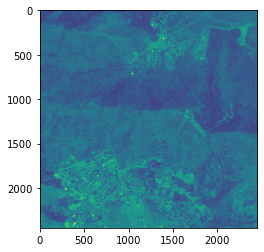

In [88]:
image = s[0,:,:,0]
plt.imshow(image)
plt.show()

In [113]:
x, h, w, c = train_generator.next()

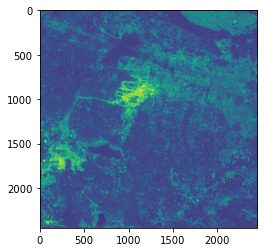

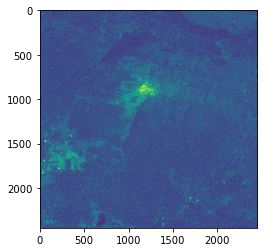

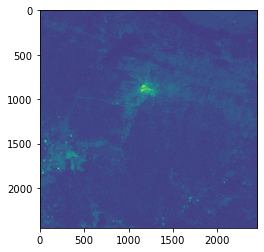

In [117]:
for i in range(0,3):
    image = x[:,:,i]
    plt.imshow(image)
    plt.show()

# Splitting

In [133]:
def split_image(image3, tile_size):
    image_shape = tf.shape(image3)
    tile_rows = tf.reshape(image3, [image_shape[0], -1, tile_size[1], image_shape[2]])
    serial_tiles = tf.transpose(tile_rows, [1, 0, 2, 3])
    return tf.reshape(serial_tiles, [-1, tile_size[1], tile_size[0], image_shape[2]])

def unsplit_image(tiles4, image_shape):
    tile_width = tf.shape(tiles4)[1]
    serialized_tiles = tf.reshape(tiles4, [-1, image_shape[0], tile_width, image_shape[2]])
    rowwise_tiles = tf.transpose(serialized_tiles, [1, 0, 2, 3])
    return tf.reshape(rowwise_tiles, [image_shape[0], image_shape[1], image_shape[2]])

In [161]:
tile_size = int(img_height/4)
tile_size

612

In [167]:
tiles = split_image(x[0,:,:,:], [tile_size, tile_size])

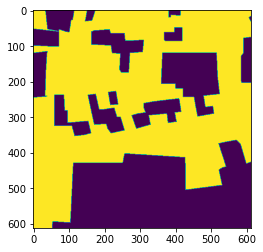

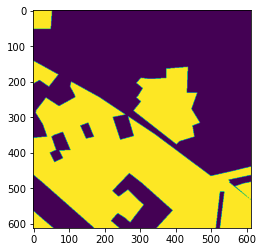

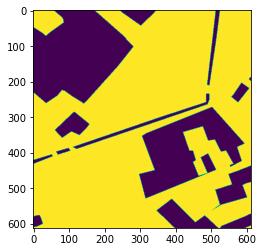

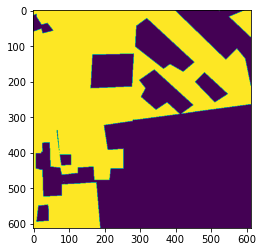

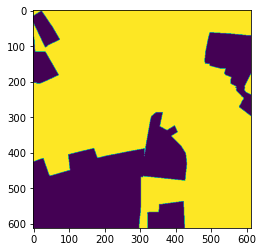

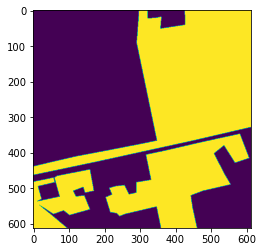

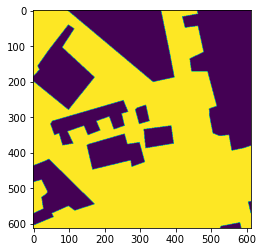

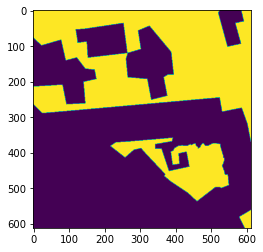

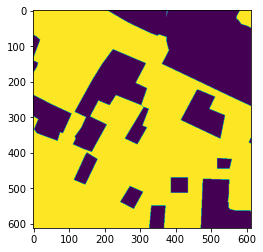

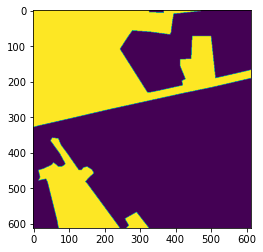

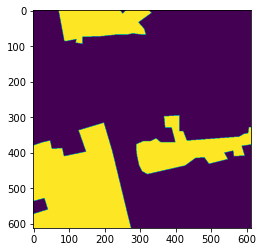

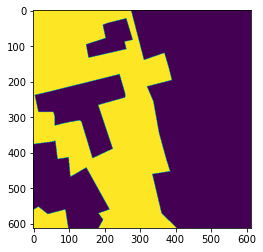

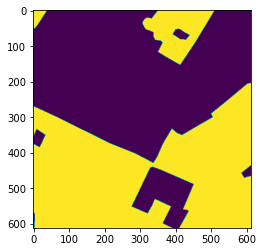

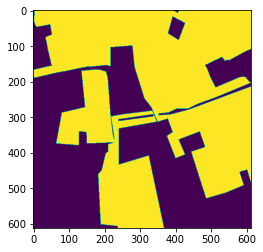

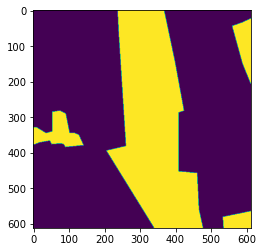

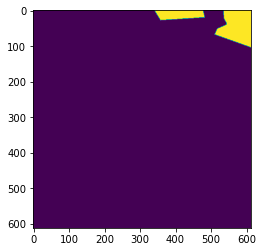

In [169]:
tiles.shape
for i in range(tiles.shape[0]):
    image = tiles[i,:,:,0]
    plt.imshow(image)
    plt.show()

In [141]:
recon = unsplit_image(tiles, tf.shape(x))


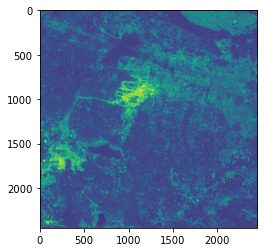

In [143]:
image = recon[:,:,0]
plt.imshow(image)
plt.show()

In [144]:
tiles.shape


TensorShape([16, 612, 612, 3])

# Save Image Tiles

In [147]:
tf.keras.preprocessing.image.save_img('../Cropping_Test/im_1.jpg', tiles[0,:,:,:], data_format=None, file_format=None, scale=True)

JPEG
(612, 612)
RGB


(612, 612, 3)

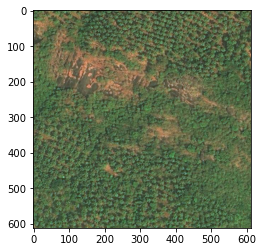

In [183]:
image = PIL.Image.open('../Cropping_Test/im_1.jpg')
print(image.format)
print(image.size)
print(image.mode)
# show the image
plt.imshow(image)
np.asarray(image).shape

# Pipeline to read and transfer to numpy array

In [ ]:
data_gen = ImageDataGenerator(rescale = 1. / 255)

data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
data_list = []
batch_index = 0

while batch_index <= data_generator.batch_index:
    data = data_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

# now, data_array is the numeric data of whole images
data_array = np.asarray(data_list)